# Finding Heavy Traffic Indicators on I-94

### While working on a dataset downloaded from  UCI Machine Learning Repository, we'll be exploring the different variables that effect traffic on the I-94 highway.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metro=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [24]:
metro.head(50)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,NaN,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,NaN,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,NaN,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,NaN,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,NaN,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


#### description of each column

holiday: US National holidays plus regional holiday, Minnesota State Fair
temp: Average temp in kelvin
rain_1h: Amount in mm of rain that occurred in the hour
snow_1h: Amount in mm of snow that occurred in the hour
clouds_all: Percentage of cloud cover
weather_main: Short textual description of the current weather
weather_description: Longer textual description of the current weather
date_time: Hour of the data collected in local CST time
traffic_volume: Hourly I-94 ATR 301 reported westbound traffic volume

Text(0.5, 0, 'Traffic Volume')

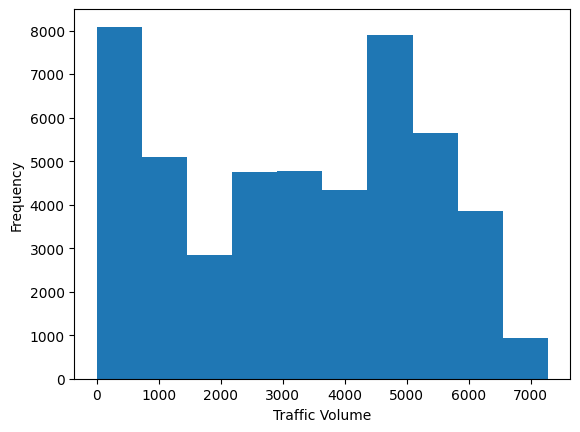

In [3]:
### histogram to show overall traffic volume frequency
metro["traffic_volume"].plot.hist()
plt.xlabel('Traffic Volume')

In [5]:
print(metro["traffic_volume"].describe())

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [4]:
metro["date_time"] = pd.to_datetime(metro["date_time"])
hourcol = metro["date_time"].dt.hour
print(hourcol)

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int32


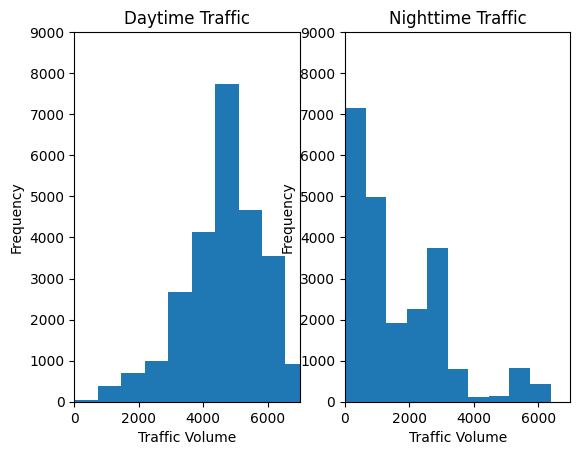

In [7]:
#daytime
plt.subplot(1, 2, 1)
plt.hist(metro.loc[hourcol.between(7,19), "traffic_volume"])
plt.title("Daytime Traffic")
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")
plt.ylim([0,9000])
plt.xlim([0,7000])

#nighttime
plt.subplot(1, 2, 2)
plt.hist(metro.loc[~hourcol.between(7,19), "traffic_volume"])
plt.title("Nighttime Traffic")
plt.ylabel("Frequency")
plt.xlabel("Traffic Volume")
plt.ylim([0,9000])
plt.xlim([0,7000])

plt.show()




#### There is a high frrequency of larger traffic volumes in the day time (which is defined here as 7 A.M. to 7 P.M.) and high frequency of smaller traffic volumes at night time.

In [8]:
print((metro.loc[hourcol.between(7,19), "traffic_volume"]).describe())

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [9]:
print(metro.loc[~hourcol.between(7,19), "traffic_volume"].describe())

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64


In [10]:
print(metro[hourcol.between(7,19)])

      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0         NaN  288.28     0.00      0.0          40       Clouds   
1         NaN  289.36     0.00      0.0          75       Clouds   
2         NaN  289.58     0.00      0.0          90       Clouds   
3         NaN  290.13     0.00      0.0          90       Clouds   
4         NaN  291.14     0.00      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48195     NaN  283.84     0.00      0.0          75      Drizzle   
48196     NaN  284.38     0.00      0.0          75         Rain   
48197     NaN  284.79     0.00      0.0          75       Clouds   
48198     NaN  284.20     0.25      0.0          75         Rain   
48199     NaN  283.45     0.00      0.0          75       Clouds   

           weather_description           date_time  traffic_volume  
0             scattered clouds 2012-10-02 09:00:00            5545  
1                broken clouds 2012-10-02 10:

In [6]:
#only the daytime data
day=metro[hourcol.between(7,19)]


In [34]:
print(by_month['traffic_volume'])

month
1     2149
2     1885
3     2005
4     2255
5     2398
6     2046
7     2567
8     2335
9     2027
10    1883
11    1955
12    2333
Name: traffic_volume, dtype: int64


In [7]:
month = day['date_time'].dt.month
day.loc[:, 'month'] = month
by_month = day.groupby('month')['traffic_volume'].mean()


/tmp/ipykernel_94/2804918145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day.loc[:, 'month'] = month


In [8]:
print(by_month)

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64


Text(0.5, 0, 'Month')

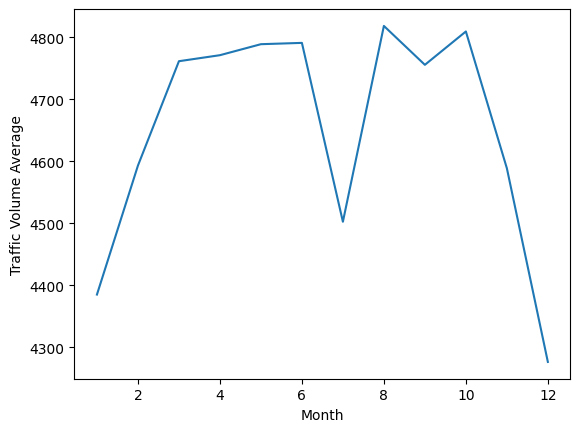

In [9]:
plt.plot(by_month)
plt.ylabel("Traffic Volume Average")
plt.xlabel("Month")

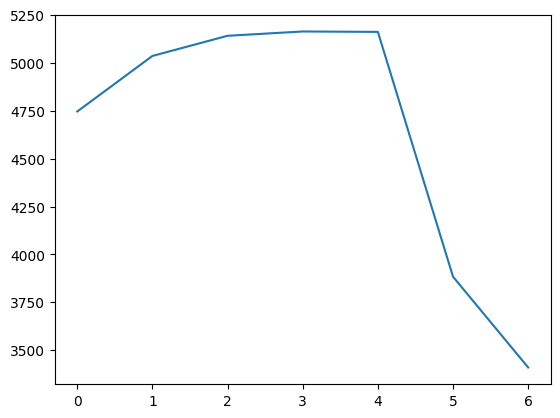

In [44]:
day.loc[:,'dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek')['traffic_volume'].mean()
plt.plot(by_dayofweek)  # 0 is Monday, 6 is Sunday

In [46]:
day.loc[:,'hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour')['traffic_volume'].mean()
by_hour_weekend = weekend.groupby('hour')['traffic_volume'].mean()

(0.0, 7000.0)

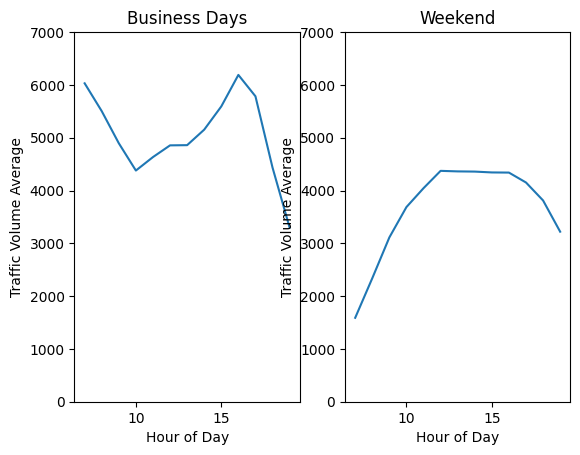

In [47]:
#business days
plt.subplot(1, 2, 1)
plt.plot(by_hour_business)
plt.title("Business Days")
plt.ylabel("Traffic Volume Average")
plt.xlabel("Hour of Day")
plt.ylim([0,7000])

#weekend hours
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend)
plt.title("Weekend")
plt.ylabel("Traffic Volume Average")
plt.xlabel("Hour of Day")
plt.ylim([0,7000])

#print(by_hour_business['traffic_volume'])
#print(by_hour_weekend['traffic_volume'])

In [51]:
metro.corr(numeric_only=True)

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


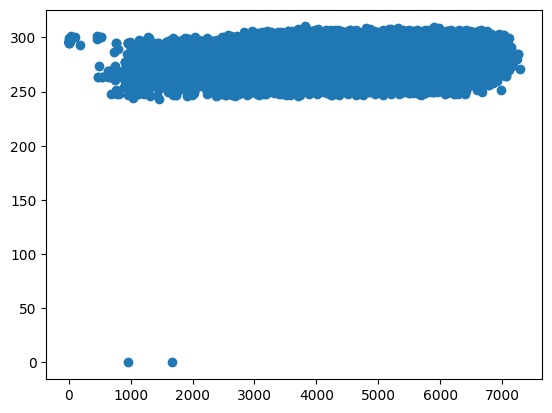

In [49]:
plt.scatter(day['traffic_volume'],day['temp'])

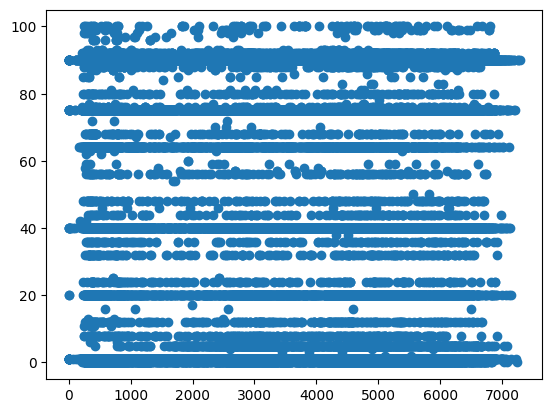

In [50]:
plt.scatter(metro['traffic_volume'],metro['clouds_all'])

In [10]:
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean()

In [54]:
by_weather_main.index

Index(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke',
       'Snow', 'Squall', 'Thunderstorm'],
      dtype='object', name='weather_main')

Text(0.5, 0, 'Traffic Volume Average')

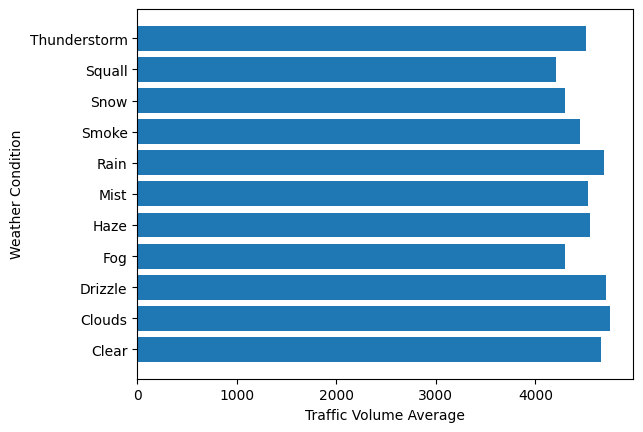

In [11]:
plt.barh(by_weather_main.index, by_weather_main)
plt.ylabel("Weather Condition")
plt.xlabel("Traffic Volume Average")

<Figure size 3000x10000 with 0 Axes>

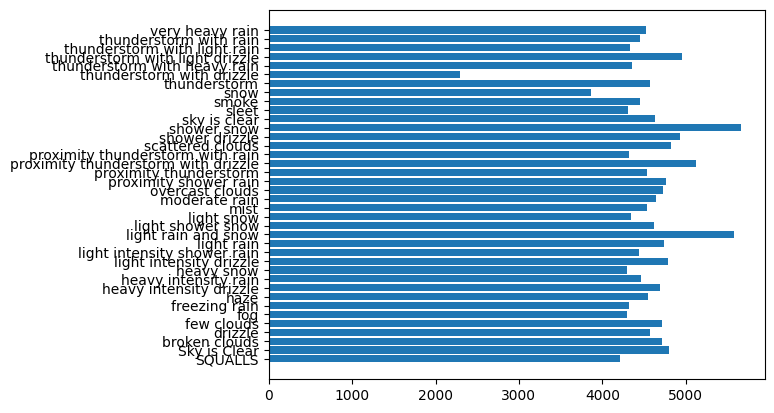

<Figure size 3000x10000 with 0 Axes>

In [58]:
plt.barh(by_weather_description.index, by_weather_description)
plt.figure(figsize=(30,100))